Feature variances (first 5 & last 5):
 [0.00000000e+00 8.22539514e-01 2.25957923e+01 1.80426111e+01
 1.83714668e+01 1.91272977e+05 2.43302896e+05 3.47979731e+05
 1.67232706e+05 3.45812736e+04]

=== WITHOUT SCALING ===
Top 5 explained variance ratios: [0.2347 0.1473 0.134  0.0959 0.0726]
Cumulative for top 5 PCs: [0.2347 0.382  0.516  0.6118 0.6844]

=== WITH SCALING ===
Top 5 explained variance ratios: [0.1203 0.0956 0.0844 0.065  0.0486]
Cumulative for top 5 PCs: [0.1203 0.2159 0.3004 0.3654 0.414 ]


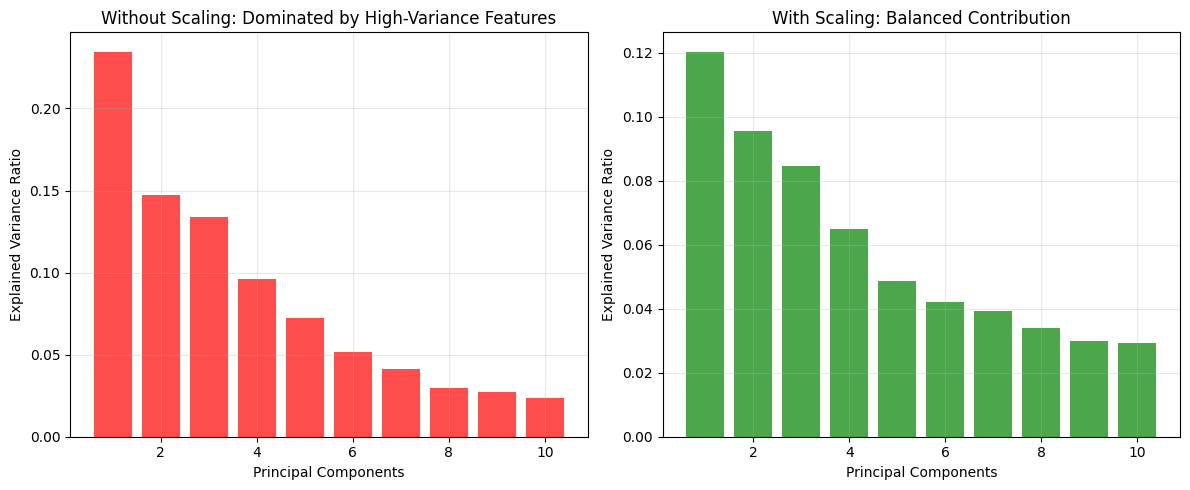

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data
digits = load_digits()
X = digits.data  # 1797 x 64

# Exaggerate scale difference: multiply last 34 features by 100
X_modified = X.copy()
X_modified[:, 30:] *= 100

print("Feature variances (first 5 & last 5):\n", np.var(X_modified, axis=0)[[0,1,2,3,4,-5,-4,-3,-2,-1]])

# 1. PCA WITHOUT scaling
pca_no_scale = PCA()
pca_no_scale.fit(X_modified)

# 2. PCA WITH scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_modified)
pca_scale = PCA()
pca_scale.fit(X_scaled)

# Print results
print("\n=== WITHOUT SCALING ===")
print("Top 5 explained variance ratios:", np.round(pca_no_scale.explained_variance_ratio_[:5], 4))
print("Cumulative for top 5 PCs:", np.round(np.cumsum(pca_no_scale.explained_variance_ratio_[:5]), 4))

print("\n=== WITH SCALING ===")
print("Top 5 explained variance ratios:", np.round(pca_scale.explained_variance_ratio_[:5], 4))
print("Cumulative for top 5 PCs:", np.round(np.cumsum(pca_scale.explained_variance_ratio_[:5]), 4))

# Plot bar charts for comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Top 10 PCs without scaling
ax1.bar(range(1, 11), pca_no_scale.explained_variance_ratio_[:10], alpha=0.7, color='red')
ax1.set_title('Without Scaling: Dominated by High-Variance Features')
ax1.set_xlabel('Principal Components')
ax1.set_ylabel('Explained Variance Ratio')
ax1.grid(True, alpha=0.3)

# Top 10 PCs with scaling
ax2.bar(range(1, 11), pca_scale.explained_variance_ratio_[:10], alpha=0.7, color='green')
ax2.set_title('With Scaling: Balanced Contribution')
ax2.set_xlabel('Principal Components')
ax2.set_ylabel('Explained Variance Ratio')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

PCs for 95% variance: 40
PCs for 99% variance: 54
Cumulative for first 10 PCs: [0.1203 0.2159 0.3004 0.3654 0.414  0.4561 0.4955 0.5294 0.5594 0.5887]


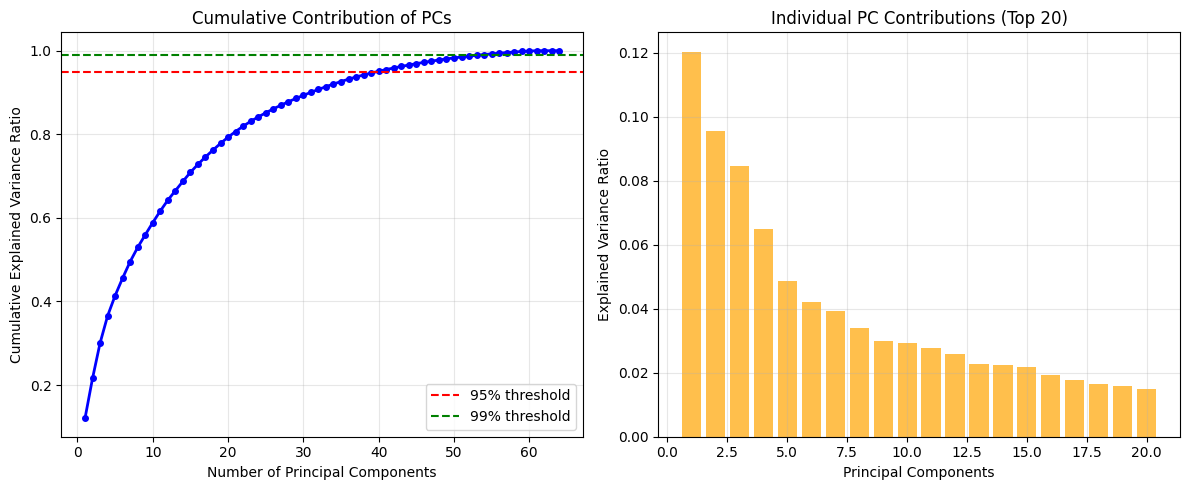

In [2]:

# Load and scale data (no modification this time)
digits = load_digits()
X = digits.data

#Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA (full components)
pca = PCA()
pca.fit(X_scaled)

# Cumulative explained variance
cum_var = np.cumsum(pca.explained_variance_ratio_)

# Print key stats
n_95 = np.argmax(cum_var >= 0.95) + 1
n_99 = np.argmax(cum_var >= 0.99) + 1
print(f"PCs for 95% variance: {n_95}")
print(f"PCs for 99% variance: {n_99}")
print("Cumulative for first 10 PCs:", np.round(cum_var[:10], 4))

# Plot 1: Cumulative Variance (elbow for # PCs)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(cum_var) + 1), cum_var, 'b-', linewidth=2, marker='o', markersize=4)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
plt.axhline(y=0.99, color='g', linestyle='--', label='99% threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Contribution of PCs')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Individual contributions (scree plot)
plt.subplot(1, 2, 2)
plt.bar(range(1, 21), pca.explained_variance_ratio_[:20], alpha=0.7, color='orange')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Individual PC Contributions (Top 20)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Dataset: (1797, 64), Classes: [0 1 2 3 4 5 6 7 8 9]
PCA explained variance (50 components): 0.983


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


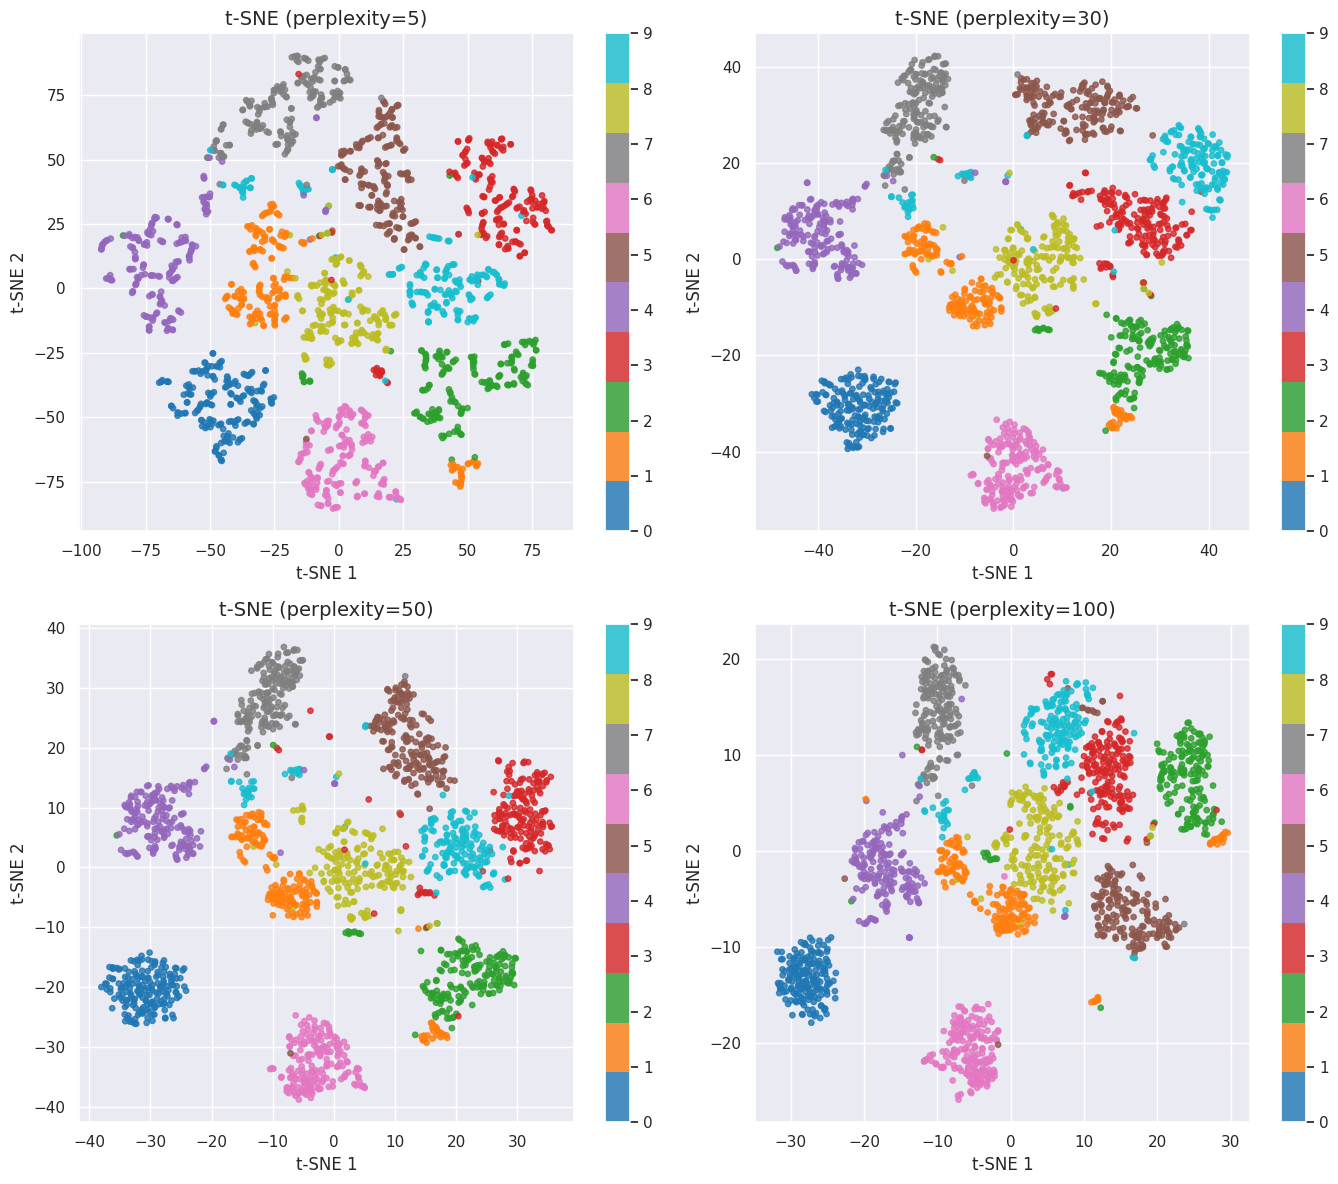

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# import seaborn as sns

# Set style
sns.set_theme()
sns.set_palette("hsv")

# 1. Load data
digits = load_digits()
X = digits.data    # (1797, 64)
y = digits.target  # labels 0-9

print(f"Dataset: {X.shape}, Classes: {np.unique(y)}")

# 2. Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Optional: Reduce to 50D with PCA (faster, less noise)
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print(f"PCA explained variance (50 components): {pca.explained_variance_ratio_.sum():.3f}")

# 4. t-SNE: Try different perplexities
perplexities = [5, 30, 50, 100]
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for i, perp in enumerate(perplexities):
    tsne = TSNE(
        n_components=2,
        perplexity=perp,
        learning_rate='auto',
        n_iter=1000,
        random_state=42,
        init='pca'  # Better initialization
    )
    X_tsne = tsne.fit_transform(X_pca if i > 0 else X_scaled)  # Use PCA for perp>5

    im = axes[i].scatter(
        X_tsne[:, 0], X_tsne[:, 1],
        c=y, cmap='tab10', s=15, alpha=0.8
    )
    axes[i].set_title(f't-SNE (perplexity={perp})', fontsize=14)
    axes[i].set_xlabel('t-SNE 1')
    axes[i].set_ylabel('t-SNE 2')
    plt.colorbar(im, ax=axes[i], ticks=range(10))

plt.tight_layout()
plt.show()

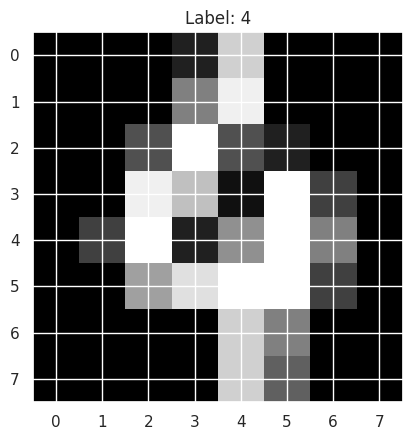

In [8]:
plt.imshow(X[100].reshape(8,8), cmap='gray')
plt.title(f"Label: {y[100]}")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


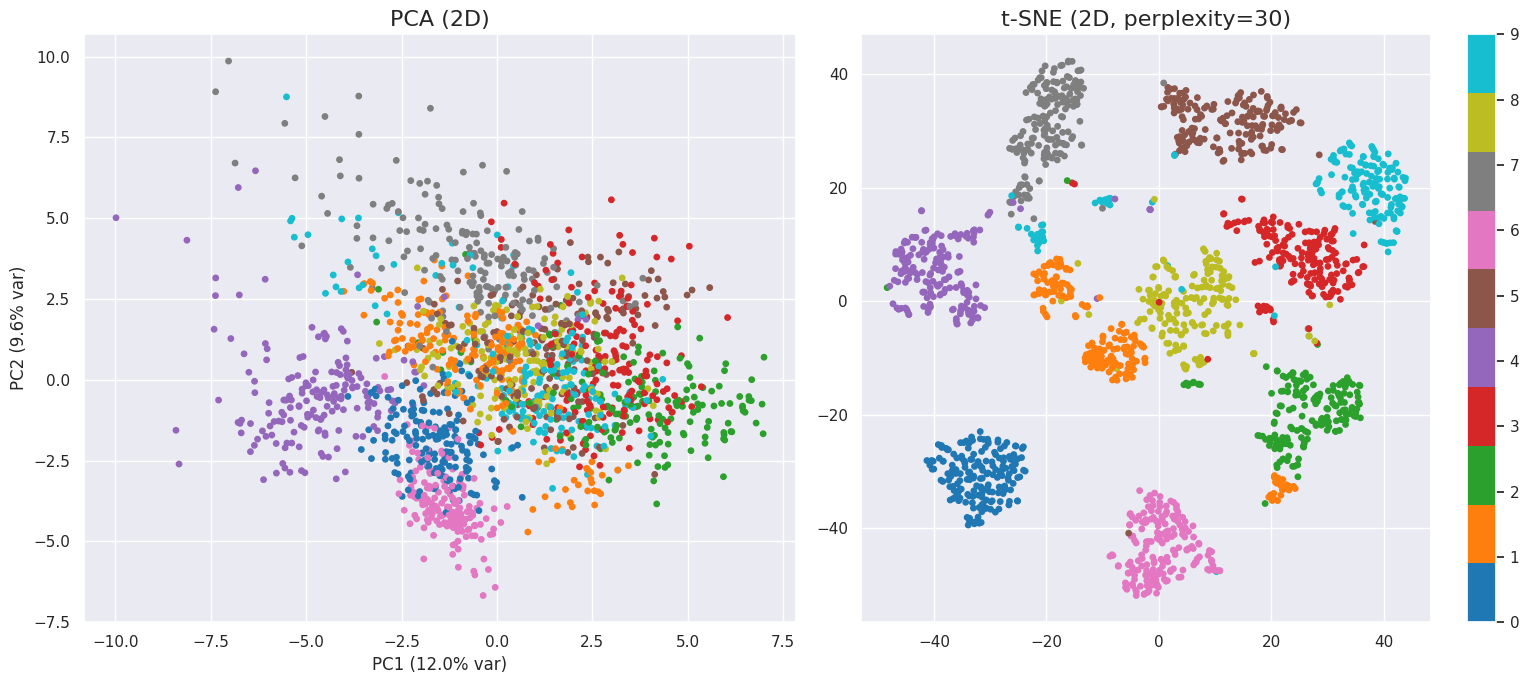

In [9]:
# PCA 2D
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# t-SNE 2D (perplexity=30)
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42, init='pca')
X_tsne_2d = tsne.fit_transform(X_pca)  # Using PCA-50 as input

# Plot both
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# PCA
ax1.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='tab10', s=15)
ax1.set_title('PCA (2D)', fontsize=16)
ax1.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%} var)')
ax1.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%} var)')

# t-SNE
im = ax2.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=y, cmap='tab10', s=15)
ax2.set_title('t-SNE (2D, perplexity=30)', fontsize=16)
plt.colorbar(im, ax=ax2, ticks=range(10))

plt.tight_layout()
plt.show()